In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('final_data (1).csv')

In [3]:
data

,Unnamed: 0.2,Unnamed: 0,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate,LEMM,Unnamed: 0.1
0,0,0,False,False,False,False,False,False,False,False,False,False,"If people would take step back make case , ' a...",NaN
1,1,1,True,True,False,False,False,False,False,False,False,False,Law enforcement trained shoot apprehend . They...,NaN
2,2,2,True,True,False,False,True,False,False,False,False,False,Dont reckon 'black life matter ' banner held w...,NaN
3,3,3,False,False,False,False,False,False,False,False,False,False,There large number people like police officer ...,NaN
4,4,4,False,False,False,False,False,False,False,False,False,False,"The Arab dude absolutely right , shot 6 extra ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6169,1995,1995,False,False,False,False,False,False,False,False,False,False,I remember national defense sent,NaN
6170,1996,1996,True,False,False,False,False,True,True,False,False,False,Statistics represent the problem. Race batting...,NaN
6171,1997,1997,False,False,False,False,False,False,False,False,False,False,Quote mother ... Wow tight collision. Absolute...,NaN
6172,1998,1998,False,False,False,False,False,False,False,False,False,False,Video racist,NaN


In [58]:
Y = data['IsToxic']
X = data['LEMM']
X_train_bow, X_test_bow, Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

vectorizer = CountVectorizer()
vectorizer.fit(X_train_bow)
X_train_bow = vectorizer.transform(X_train_bow)
X_test_bow = vectorizer.transform(X_test_bow)

X_train_bow = X_train_bow.toarray()
Y_train = Y_train.to_numpy()
X_test_bow = X_test_bow.toarray()
Y_test = Y_test.to_numpy()

In [6]:
data.drop('Unnamed: 0.1',axis = 1,inplace = True)
# data.drop('Unnamed: 0',axis = 1,inplace = True)
# data.drop('CommentId',axis = 1,inplace = True)
# data.drop('VideoId',axis = 1,inplace = True)

In [7]:
data.head()

,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate,LEMM
0,False,False,False,False,False,False,False,False,False,False,"If people would take step back make case , ' a..."
1,True,True,False,False,False,False,False,False,False,False,Law enforcement trained shoot apprehend . They...
2,True,True,False,False,True,False,False,False,False,False,Dont reckon 'black life matter ' banner held w...
3,False,False,False,False,False,False,False,False,False,False,There large number people like police officer ...
4,False,False,False,False,False,False,False,False,False,False,"The Arab dude absolutely right , shot 6 extra ..."


In [8]:
data.shape

(6174, 11)

In [79]:
## USING REGEX REMOVE STOPWORDS
## CURRENTLY REMOVING STOPWORDS THROUGH NLTK
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
def stopword_removal(txt):
    stpwrds = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b') 
    txt = stpwrds.sub('', txt)
    li = list(txt.split(" "))
    return li
    #\s*

data["STOP"] = data["Text"].apply(lambda x:stopword_removal(x))
data.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate,STOP
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,"[If, , people, would, , take, , step, back, , ..."
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,"[Law, enforcement, , , trained, , shoot, , app..."
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,"[\nDont, , reckon, , 'black, lives, matter', b..."
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,"[There, , , , large, number, , people, , , , l..."
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,"[The, Arab, dude, , absolutely, right,, , , , ..."


In [80]:
nostop = []
for i in range(len(data)):
    nostop.append(' '.join(data["STOP"][i]))
data["NOSTOP"] = nostop
data.drop(['STOP'],axis=1)

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate,NOSTOP
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,If people would take step back make case...
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,Law enforcement trained shoot apprehend. ...
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,\nDont reckon 'black lives matter' banners ...
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,There large number people like police o...
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,"The Arab dude absolutely right, shot 6 e..."
...,...,...,...,...,...,...,...,...,...,...,...,...
995,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,I remember sent national defence
996,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,Stats ` represent problem. Race baiting atti...
997,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,The quote mother... Wow hit hard. Very accu...
998,this video is so racist,False,False,False,False,False,False,False,False,False,False,video racist


In [81]:
'''
C. LEMMATIZATION
importing WordNetLemmatizer from NLTK
'''
from nltk.tokenize import sent_tokenize,word_tokenize
lemmatizer = WordNetLemmatizer()
def lemmatize(txt):
    lemm = [lemmatizer.lemmatize(word) for word in word_tokenize(txt)]
    return lemm

data["lemm"] = data["NOSTOP"].apply(lambda x:lemmatize(x))
lemma = []
for i in range(len(data)):
    lemma.append(' '.join(data["lemm"][i]))
data["LEMM"] = lemma

In [82]:
data.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate,STOP,NOSTOP,lemm,LEMM
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,"[If, , people, would, , take, , step, back, , ...",If people would take step back make case...,"[If, people, would, take, step, back, make, ca...","If people would take step back make case , any..."
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,"[Law, enforcement, , , trained, , shoot, , app...",Law enforcement trained shoot apprehend. ...,"[Law, enforcement, trained, shoot, apprehend, ...",Law enforcement trained shoot apprehend . They...
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,"[\nDont, , reckon, , 'black, lives, matter', b...",\nDont reckon 'black lives matter' banners ...,"[Dont, reckon, 'black, life, matter, ', banner...",Dont reckon 'black life matter ' banner held w...
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,"[There, , , , large, number, , people, , , , l...",There large number people like police o...,"[There, large, number, people, like, police, o...",There large number people like police officer ...
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,"[The, Arab, dude, , absolutely, right,, , , , ...","The Arab dude absolutely right, shot 6 e...","[The, Arab, dude, absolutely, right, ,, shot, ...","The Arab dude absolutely right , shot 6 extra ..."


In [29]:
len(data)

1000

In [30]:
data

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate,STOP,NOSTOP,lemm,LEMM
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,"[If, , people, would, , take, , step, back, , ...",If people would take step back make case...,"[If, people, would, take, step, back, make, ca...","If people would take step back make case , any..."
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,"[Law, enforcement, , , trained, , shoot, , app...",Law enforcement trained shoot apprehend. ...,"[Law, enforcement, trained, shoot, apprehend, ...",Law enforcement trained shoot apprehend . They...
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,"[\nDont, , reckon, , 'black, lives, matter', b...",\nDont reckon 'black lives matter' banners ...,"[Dont, reckon, 'black, life, matter, ', banner...",Dont reckon 'black life matter ' banner held w...
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,"[There, , , , large, number, , people, , , , l...",There large number people like police o...,"[There, large, number, people, like, police, o...",There large number people like police officer ...
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,"[The, Arab, dude, , absolutely, right,, , , , ...","The Arab dude absolutely right, shot 6 e...","[The, Arab, dude, absolutely, right, ,, shot, ...","The Arab dude absolutely right , shot 6 extra ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,"[I, remember, , , sent, , , national, defence, ]",I remember sent national defence,"[I, remember, sent, national, defence]",I remember sent national defence
996,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,"[Stats, `, represent, , problem., Race, baitin...",Stats ` represent problem. Race baiting atti...,"[Stats, `, represent, problem, ., Race, baitin...",Stats ` represent problem . Race baiting attit...
997,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,"[The, quote, , , mother..., Wow, , hit, hard.,...",The quote mother... Wow hit hard. Very accu...,"[The, quote, mother, ..., Wow, hit, hard, ., V...",The quote mother ... Wow hit hard . Very accur...
998,this video is so racist,False,False,False,False,False,False,False,False,False,False,"[, video, , , racist]",video racist,"[video, racist]",video racist


In [38]:
Y = data['IsToxic']
X = data['LEMM']
X_train_bow, X_test_bow, Y_train , Y_test = train_test_split(X,Y)

## splitting the train set into train and val
# X_train_bow,X_val_bow,Y_train,Y_val = train_test_split(X_train_bow,Y_train,test_size=0.15, random_state=42)

vectorizer = CountVectorizer()
vectorizer.fit(X_train_bow)
X_train_bow = vectorizer.transform(X_train_bow)
# X_val_bow = vectorizer.transform(X_val_bow)
X_test_bow = vectorizer.transform(X_test_bow)

In [39]:
## (750, 3565)
print(X_train_bow.shape)
print(X_val_bow.shape)
print(X_test_bow.shape)

(750, 3652)
(113, 3171)
(250, 3652)


In [40]:
Y_train = Y_train.to_numpy()
# Y_val = Y_val.to_numpy()
Y_test = Y_test.to_numpy()

(750,)

In [34]:
Y_train[284]

True

In [14]:
## mlp classifier (neural network)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
def mlpclassifier(X_train,y_train,X_val,y_val,X_test,y_test,activation_function,learning_rate='constant',l1=256,l2=32):
    
    ## initializing the model
    model = MLPClassifier(activation=activation_function,hidden_layer_sizes=(3354,32,8), max_iter=50,alpha=1e-4,solver='adam',verbose=0, tol=1e-8, random_state=1)
    
    
    ## declaring the batch size , epoch count
    epoch_count = 15
    batch_size = 50
    samples_count = X_train.shape[0]
    classes_unique = np.unique(y_train)

    training_log_loss = np.array([])
    validation_log_loss = np.array([])

    ## Doing multiple passes over the data
    epoch = 0
    while(epoch<epoch_count):
        print('epoch: ', epoch)
        mini_batch_index = 0
        flag = True
        
        ## shuffling the data randomly using utility from np.random.permutation
        rand_selection = np.random.permutation(X_train.shape[0])
        
        ## training over the mini batches
        while(mini_batch_index<samples_count):
            indices = rand_selection[mini_batch_index:mini_batch_index+batch_size]
            model.partial_fit(X_train[indices], y_train[indices], classes=classes_unique)
            mini_batch_index = mini_batch_index + batch_size
            
        ## appending the train and val losses in their respective numpy arrays
        pred_y = model.predict_proba(X_train)
        curr_train_loss = log_loss(y_train,pred_y) # training performances

        pred_val_y = model.predict_proba(X_val) 
        curr_val_loss = log_loss(y_val,pred_val_y) # validation performances

        new_training_log_loss = np.append(training_log_loss,curr_train_loss)                  
        training_log_loss = new_training_log_loss

        new_validation_log_loss = np.append(validation_log_loss,curr_val_loss)
        validation_log_loss = new_validation_log_loss
        epoch = epoch + 1

#     print("test accuracy:",model.score(X_test,y_test))
#     print("validation accuracy:",model.score(X_val,y_val))
    
    ## plotting the valdation and training loss over the epochs
    no_of_epochs = np.arange(1,epoch_count+1)
    plt.title("Loss curves corresponding train and validation")
    plt.xlabel("no of epochs")
    plt.ylabel("loss")
    plt.plot(no_of_epochs,training_log_loss,color ="red")
    plt.plot(no_of_epochs,validation_log_loss,color ="green")
    plt.show()
    
    return (model.score(X_test,y_test),model.score(X_val,y_val))

In [59]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(3354,16,8),random_state=1, activation='tanh',max_iter=300).fit(X_train_bow,Y_train)
clf.predict(X_test_bow)

array([False,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False,  True, False, False, False,
        True,  True, False,  True, False,  True, False,  True,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True,

In [ ]:
## 0.672566371681416 --> 3354,64,16 --> 
## 0.6814 --> 3354,32,16 --> 0.724 (test) [relu]
## 0.6371 --> 3354,32,16 --> 0.704 (test) [tanh]
## 0.6814 --> 3354,32,8 --> 0.732(test) [relu]
## 0.6371 --> 3354,16,8 --> 0.708(test) [relu]

## test accuracy is  0.724
## val accuracy is  0.6548672566371682

In [36]:
# clf.score(X_val_bow,Y_val)

0.6371681415929203

In [60]:
clf.score(X_test_bow,Y_test)

0.943

# Best param MLP

In [23]:
def MLPClassifierBest(X_train, y_train, X_test, y_test):
    clf = MLPClassifier(hidden_layer_sizes=(3354,16,8), activation='tanh',solver='lbfgs',max_iter=50).fit(X_train,y_train)
    clf.predict(X_test)
    score = clf.score(X_test,y_test)
    return score

# Hyperparameter tuning

In [63]:
parameter ={'activation' : ['identity', 'tanh', 'relu'], 'solver':['lbfgs','sgd'], 'hidden_layer_sizes':(3354,16,8)}
grid = RandomizedSearchCV(MLPClassifier(), parameter, scoring='accuracy', n_jobs=-1)

grid.fit(X_train_bow, Y_train)
print(grid.best_params_)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\si

{'solver': 'lbfgs', 'hidden_layer_sizes': 16, 'activation': 'tanh'}


In [64]:
y_pred_best_mlp=clf.predict(X_test_bow)

In [65]:
accuracy_score(Y_test,y_pred_best_mlp)

0.943

In [24]:
classes = data.select_dtypes(include= ["bool"]).columns

In [25]:
classes

Index(['IsToxic', 'IsAbusive', 'IsProvocative', 'IsObscene', 'IsHatespeech',
       'IsRacist', 'IsNationalist', 'IsSexist', 'IsReligiousHate'],
      dtype='object')

In [26]:
data_bow_aug = []
data_tfidf_aug = []

In [122]:
for i in range(len(classes)):
    
    # BOW 
    accuracies = [classes[i]]
    Y = data[classes[i]]
    X = data['LEMM']
    X_train_bow, X_test_bow, Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

    ## splitting the train set into train and val
#     X_train_bow,X_val_bow,Y_train,Y_val = train_test_split(X_train_bow,Y_train,test_size=0.15, random_state=42)
    
    vectorizer = CountVectorizer()
    vectorizer.fit(X_train_bow)
    X_train_bow = vectorizer.transform(X_train_bow)
    X_test_bow = vectorizer.transform(X_test_bow)
#     X_val_bow = vectorizer.transform(X_val_bow)
    
    X_temp = X_train_bow.toarray()
    Y_temp = Y_train.to_numpy()
#     Y_temp_val = Y_val.to_numpy()
    X_temp_test = X_test_bow.toarray()
    Y_temp_test = Y_test.to_numpy()
#     X_temp_val = X_val_bow.toarray()
    
    
    ## MLP classifier
    test_accuracy = MLPClassifierBest(X_temp,Y_temp,X_temp_test,Y_temp_test)
    accuracies.append(test_accuracy)
    
    
    
    
    # TF-IDF
    accuracies_tfidf = [classes[i]]
    
    Y_tf = data[classes[i]]
    X_tf = data['LEMM']

    X_train_tf, X_test_tf, Y_train_tf , Y_test_tf = train_test_split(X_tf,Y_tf,test_size=0.2)

    ## splitting the train set into train and val
#     X_train_tf,X_val_tf,Y_train_tf,Y_val_tf = train_test_split(X_train_tf,Y_train_tf,test_size=0.15, random_state=42)

    vectorizer_tf = TfidfVectorizer(lowercase=True,stop_words='english')
    vectorizer_tf.fit(X_train_tf)
    X_train_tf = vectorizer.transform(X_train_tf)
    X_test_tf = vectorizer.transform(X_test_tf)
#     X_val_tf = vectorizer.transform(X_val_tf)
    
    X_temp_tf = X_train_tf.toarray()
    Y_temp_tf = Y_train_tf.to_numpy()
#     Y_temp_val_tf = Y_val_tf.to_numpy()
    X_temp_test_tf = X_test_tf.toarray()
    Y_temp_test_tf = Y_test_tf.to_numpy()
#     X_temp_val_tf = X_val_tf.toarray()
    
     ## MLP classifier
    test_accuracy_tfidf = MLPClassifierBest(X_temp,Y_temp,X_temp_test,Y_temp_test)
    accuracies_tfidf.append(test_accuracy_tfidf)
   
    

    
    
    data_bow_aug.append(accuracies)
    data_tfidf_aug.append(accuracies_tfidf)


KeyboardInterrupt: 

In [99]:
data_bow_df = pd.DataFrame(data_bow, columns=["Labels","MLP"])
data_bow_df

,Labels,MLP
0,IsToxic,0.680
1,IsAbusive,0.775
2,IsThreat,0.980
3,IsProvocative,0.825
4,IsObscene,0.900
5,IsHatespeech,0.820
6,IsRacist,0.845
7,IsNationalist,0.995
8,IsSexist,0.995
9,IsReligiousHate,0.985


In [100]:
data_tfidf_df = pd.DataFrame(data_tfidf, columns=["Labels","MLP"])
data_tfidf_df

,Labels,MLP
0,IsToxic,0.670
1,IsAbusive,0.745
2,IsThreat,0.985
3,IsProvocative,0.800
4,IsObscene,0.900
5,IsHatespeech,0.825
6,IsRacist,0.880
7,IsNationalist,0.995
8,IsSexist,1.000
9,IsReligiousHate,0.985


# MLP on augmented Data

In [17]:
data = data.dropna()

In [18]:
data.shape

(6000, 11)

In [27]:
for i in range(len(classes)):
    raw = data.iloc[0:1000,:]
    aug = data.iloc[1000:,:]
    
    # BOW 
    accuracies = [classes[i]]
#     Y = data[classes[i]]
#     X = data['LEMM']
#     X_train_bow, X_test_bow, Y_train , Y_test = train_test_split(X,Y,test_size=0.2)
    
    Y_raw = raw[classes[i]]
    X_raw = raw['LEMM']
    Y_aug = aug[classes[i]]
    X_aug = aug['LEMM']
    
    X_train_temp, X_test_temp, Y_train_temp , Y_test_temp = train_test_split(X_raw,Y_raw)

    X_test = X_test_temp
    Y_test = Y_test_temp

    X_aug = np.concatenate((X_aug , X_train_temp))
    Y_aug = np.concatenate((Y_aug , Y_train_temp))

    Y_train = Y_aug
    X_train_bow = X_aug
    X_test_bow = X_test
    Y_test = Y_test

    vectorizer = CountVectorizer()
    vectorizer.fit(X_train_bow)
    X_train_bow = vectorizer.transform(X_train_bow)
    X_test_bow = vectorizer.transform(X_test_bow)

    X_train_bow = X_train_bow.toarray()
    # Y_train = Y_train.to_numpy()
    X_test_bow = X_test_bow.toarray()
    Y_test = Y_test.to_numpy() #end here

    ## splitting the train set into train and val
#     X_train_bow,X_val_bow,Y_train,Y_val = train_test_split(X_train_bow,Y_train,test_size=0.15, random_state=42)
    
#     vectorizer = CountVectorizer()
#     vectorizer.fit(X_train_bow)
#     X_train_bow = vectorizer.transform(X_train_bow)
#     X_test_bow = vectorizer.transform(X_test_bow)
# #     X_val_bow = vectorizer.transform(X_val_bow)
    
#     X_temp = X_train_bow.toarray()
#     Y_temp = Y_train.to_numpy()
# #     Y_temp_val = Y_val.to_numpy()
#     X_temp_test = X_test_bow.toarray()
#     Y_temp_test = Y_test.to_numpy()
# #     X_temp_val = X_val_bow.toarray()
    
    
    ## MLP classifier
    test_accuracy = MLPClassifierBest(X_train_bow,Y_train,X_test_bow,Y_test)
    print(accuracies)
    print(test_accuracy)
    accuracies.append(test_accuracy)
    
    
    
    
    
    X_train_tf = X_aug
    # Y_train = Y_train
    X_test_tf = X_test
    # Y_test = Y_test

    # Tf-IDF generator
    vectorizer_tf = TfidfVectorizer(lowercase=True,stop_words='english')
    vectorizer_tf.fit(X_train_tf)
    X_train_tf = vectorizer.transform(X_train_tf)
    X_test_tf = vectorizer.transform(X_test_tf)

    X_temp_tf = X_train_tf.toarray()
    # Y_temp_tf = Y_train_tf.to_numpy()
    X_temp_test_tf = X_test_tf.toarray()
    # Y_temp_test_tf = Y_test_tf.to_numpy()

    # X_train -> X_train_tf
    # Y_train -> Y_train
    # X_test -> X_temp_test_tf
    # Y_test -> Y_test
    
    # TF-IDF
#     accuracies_tfidf = [classes[i]]
    
#     Y_tf = data[classes[i]]
#     X_tf = data['LEMM']

#     X_train_tf, X_test_tf, Y_train_tf , Y_test_tf = train_test_split(X_tf,Y_tf,test_size=0.2)

#     ## splitting the train set into train and val
# #     X_train_tf,X_val_tf,Y_train_tf,Y_val_tf = train_test_split(X_train_tf,Y_train_tf,test_size=0.15, random_state=42)

#     vectorizer_tf = TfidfVectorizer(lowercase=True,stop_words='english')
#     vectorizer_tf.fit(X_train_tf)
#     X_train_tf = vectorizer.transform(X_train_tf)
#     X_test_tf = vectorizer.transform(X_test_tf)
# #     X_val_tf = vectorizer.transform(X_val_tf)
    
#     X_temp_tf = X_train_tf.toarray()
#     Y_temp_tf = Y_train_tf.to_numpy()
# #     Y_temp_val_tf = Y_val_tf.to_numpy()
#     X_temp_test_tf = X_test_tf.toarray()
#     Y_temp_test_tf = Y_test_tf.to_numpy()
#     X_temp_val_tf = X_val_tf.toarray()
    
     ## MLP classifier
    test_accuracy_tfidf = MLPClassifierBest(X_train_tf,Y_train,X_temp_test_tf,Y_test)
    print(accuracies)
    print(test_accuracy)
    accuracies_tfidf.append(test_accuracy_tfidf)
   
    

    
    
    data_bow_aug.append(accuracies)
    data_tfidf_aug.append(accuracies_tfidf)


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


['IsToxic']
0.996


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


['IsToxic', 0.996]
0.996


NameError: name 'accuracies_tfidf' is not defined

In [21]:
accuracies

['IsToxic']

In [22]:
test_accuracy

0.996

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14


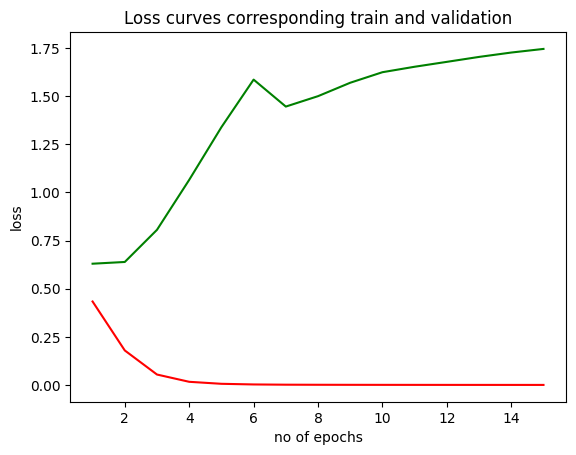

test accuracy is  0.752
val accuracy is  0.6106194690265486


In [19]:
test_accuracy,val_accuracy = mlpclassifier(X_train_bow,Y_train,X_val_bow,Y_val,X_test_bow,Y_test,'relu')
print("test accuracy is ", test_accuracy)
print("val accuracy is ",val_accuracy)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14


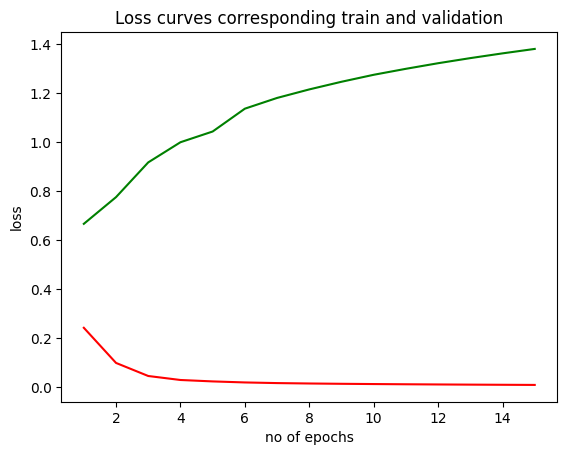

test accuracy is  0.736
val accuracy is  0.6194690265486725


In [20]:
test_accuracy,val_accuracy = mlpclassifier(X_train_bow,Y_train,X_val_bow,Y_val,X_test_bow,Y_test,'tanh')
print("test accuracy is ", test_accuracy)
print("val accuracy is ",val_accuracy)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14


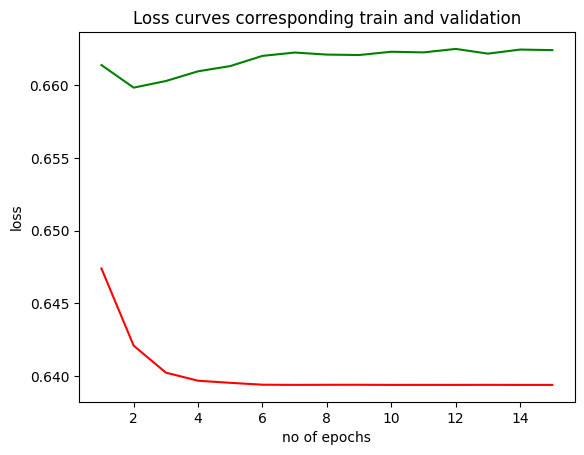

test accuracy is  0.616
val accuracy is  0.6283185840707964


In [21]:
test_accuracy,val_accuracy = mlpclassifier(X_train_bow,Y_train,X_val_bow,Y_val,X_test_bow,Y_test,'logistic')
print("test accuracy is ", test_accuracy)
print("val accuracy is ",val_accuracy)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14


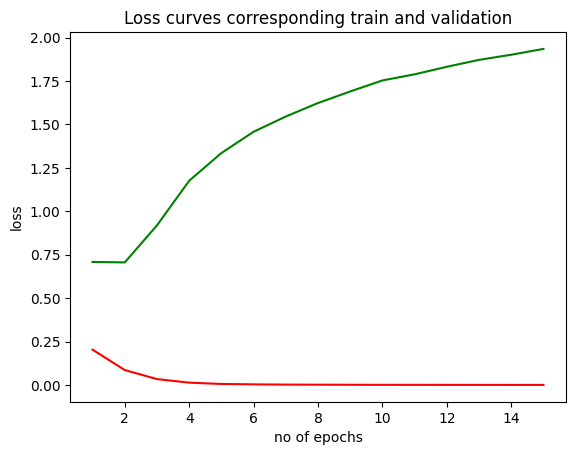

test accuracy is  0.716
val accuracy is  0.6460176991150443


In [22]:
test_accuracy,val_accuracy = mlpclassifier(X_train_bow,Y_train,X_val_bow,Y_val,X_test_bow,Y_test,'identity')
print("test accuracy is ", test_accuracy)
print("val accuracy is ",val_accuracy)

# Clustering

In [24]:
X_train_bow=X_train_bow.toarray()

In [28]:
X_train_bow.shape

(637, 3268)

In [30]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(X_train_bow)

pca_df.shape

(637, 2)

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_train_bow)
label = kmeans.predict(X_train_bow)


In [35]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

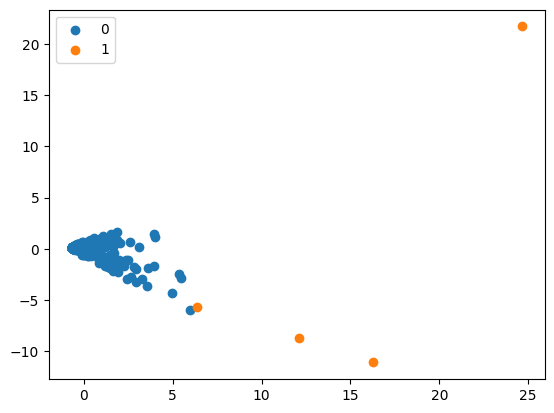

In [36]:
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    
    plt.scatter(pca_df[label == i , 0] , pca_df[label == i , 1] , label = i)

plt.legend()
plt.show()

In [38]:
Y=data["IsToxic"]

In [65]:
Y_train.shape

(637,)

In [66]:
arr = np.array([])

In [67]:
for i in range(len(Y_train)):
    if Y_train[i]==False:
        arr = np.append(arr,0)
    else:
        arr = np.append(arr,1)

In [68]:
arr
accuracy_score(arr,label)

0.5494505494505495

In [ ]:
def check_LR(data):
    raw = data.iloc[0:1000,:]
    aug = data.iloc[1000:,:]

    Y_raw = raw['IsToxic']
    X_raw = raw['LEMM']
    Y_aug = aug['IsToxic']
    X_aug = aug['LEMM']

    X_train_temp, X_test_temp, Y_train_temp , Y_test_temp = train_test_split(X_raw,Y_raw)

    X_test = X_test_temp
    Y_test = Y_test_temp

    X_aug = np.concatenate((X_aug , X_train_temp))
    Y_aug = np.concatenate((Y_aug , Y_train_temp))

    Y_train = Y_aug
    X_train_bow = X_aug
    X_test_bow = X_test
    Y_test = Y_test

    vectorizer = CountVectorizer()
    vectorizer.fit(X_train_bow)
    X_train_bow = vectorizer.transform(X_train_bow)
    X_test_bow = vectorizer.transform(X_test_bow)

    X_train_bow = X_train_bow.toarray()
    # Y_train = Y_train.to_numpy()
    X_test_bow = X_test_bow.toarray()
    Y_test = Y_test.to_numpy() 

    X_train_tf = X_aug
    # Y_train = Y_train
    X_test_tf = X_test
    # Y_test = Y_test

    # Tf-IDF generator
    vectorizer_tf = TfidfVectorizer(lowercase=True,stop_words='english')
    vectorizer_tf.fit(X_train_tf)
    X_train_tf = vectorizer.transform(X_train_tf)
    X_test_tf = vectorizer.transform(X_test_tf)

    X_temp_tf = X_train_tf.toarray()
    # Y_temp_tf = Y_train_tf.to_numpy()
    X_temp_test_tf = X_test_tf.toarray()
    # Y_temp_test_tf = Y_test_tf.to_numpy()

    # X_train -> X_train_tf
    # Y_train -> Y_train
    # X_test -> X_temp_test_tf
    # Y_test -> Y_test

    clf1 = LogisticRegression()
    clf1.fit(X_train_bow , Y_train)

    y_pred1 = clf1.predict(X_test_bow)
    score1 = accuracy_score(y_pred1 , Y_test)

    clf = LogisticRegression()
    clf.fit(X_train_tf , Y_train)

    y_pred = clf.predict(X_temp_test_tf)
    score = accuracy_score(y_pred , Y_test)

    return (score1,score)